In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from utils.conn_data import load_data

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=13)

In [27]:
# load toy data
df = load_data(dataset_name="fredmd_raw_df")
df.index = pd.to_datetime(df.index)
# cpi all items yoy
cpi = df[["CPIAUCSL"]].dropna()
cpi_yoy = (df[["CPIAUCSL"]].pct_change(12) * 100).dropna()
cpi_mom = (df[["CPIAUCSL"]].pct_change(1) * 100).dropna()

<AxesSubplot:xlabel='date'>

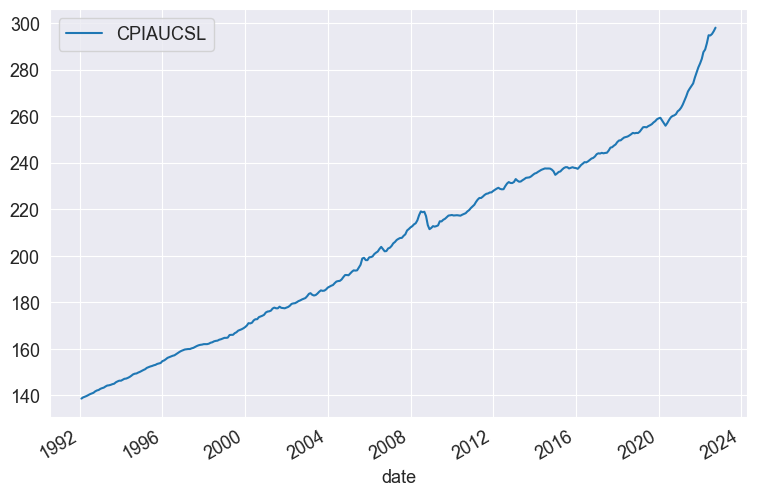

In [29]:
cpi.plot(figsize=(9, 6))

<AxesSubplot:xlabel='date'>

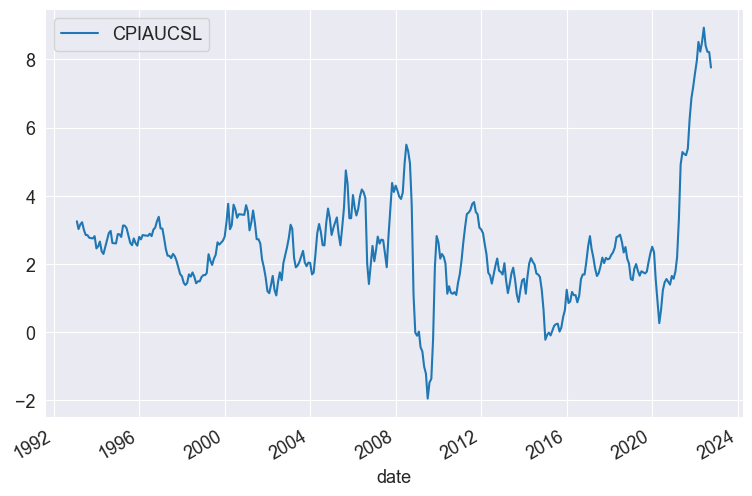

In [24]:
cpi_yoy.plot(figsize=(9, 6))

<AxesSubplot:xlabel='date'>

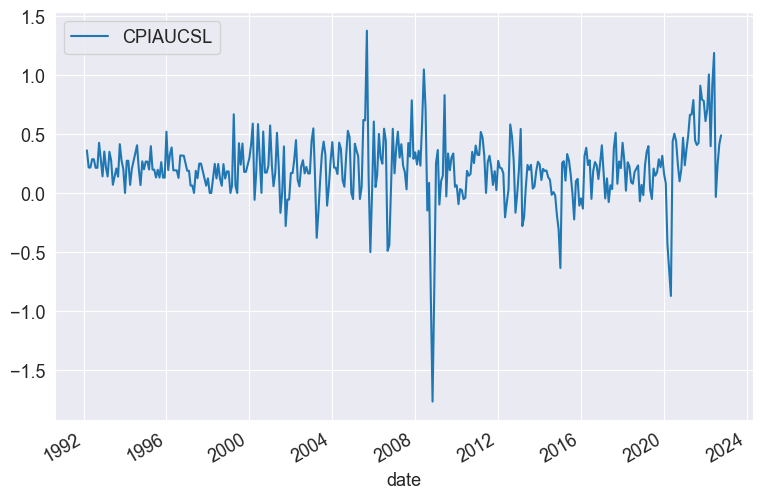

In [25]:
cpi_mom.plot(figsize=(9, 6))

In [3]:
?STL

Init signature: STL(self, /, *args, **kwargs)
Docstring:     
STL(endog, period=None, seasonal=7, trend=None, low_pass=None,
    seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=False,
    seasonal_jump=1, trend_jump=1, low_pass_jump=1)

Season-Trend decomposition using LOESS.

Parameters
----------
endog : array_like
    Data to be decomposed. Must be squeezable to 1-d.
period : {int, None}, optional
    Periodicity of the sequence. If None and endog is a pandas Series or
    DataFrame, attempts to determine from endog. If endog is a ndarray,
    period must be provided.
seasonal : int, optional
    Length of the seasonal smoother. Must be an odd integer, and should
    normally be >= 7 (default).
trend : {int, None}, optional
    Length of the trend smoother. Must be an odd integer. If not provided
    uses the smallest odd integer greater than
    1.5 * period / (1 - 1.5 / seasonal), following the suggestion in
    the original implementation.
low_pass : {int, None}, optional
   

## 1) CPI

/Users/danieloliveira/opt/anaconda3/envs/fsl-ts/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


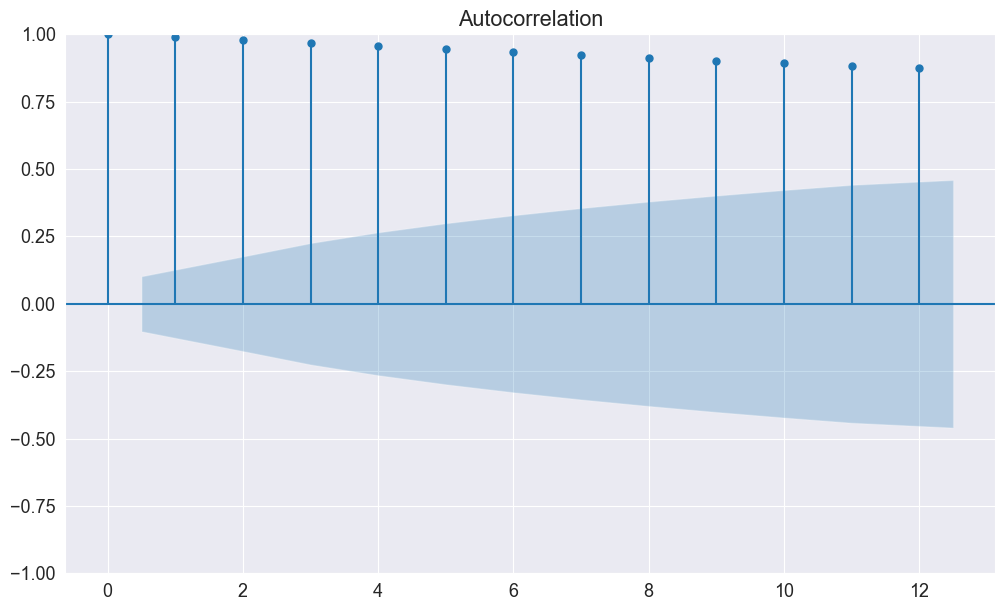

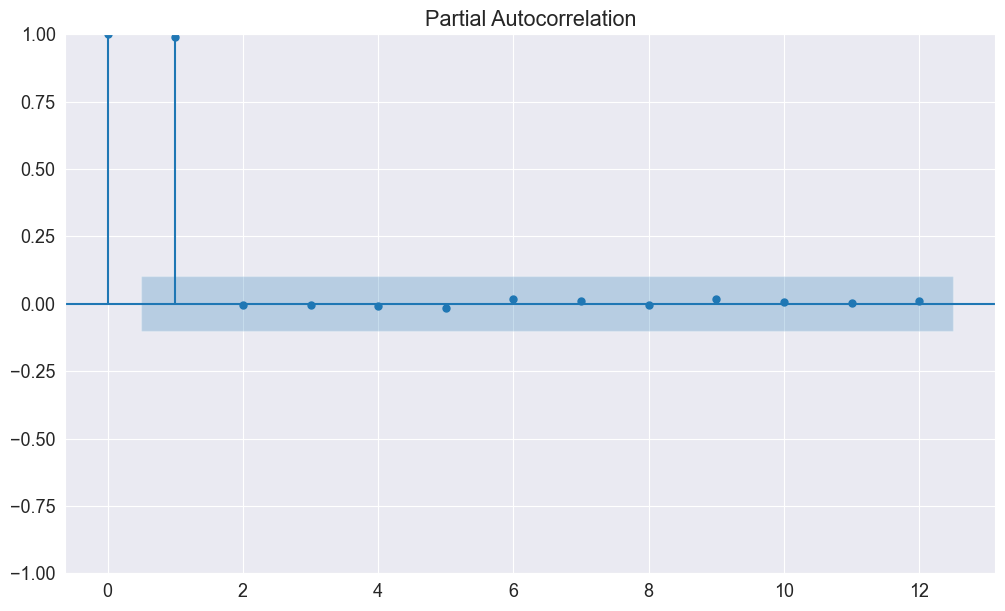

In [34]:

acf = plot_acf(cpi, lags = 12)
pacf = plot_pacf(cpi, lags = 12)

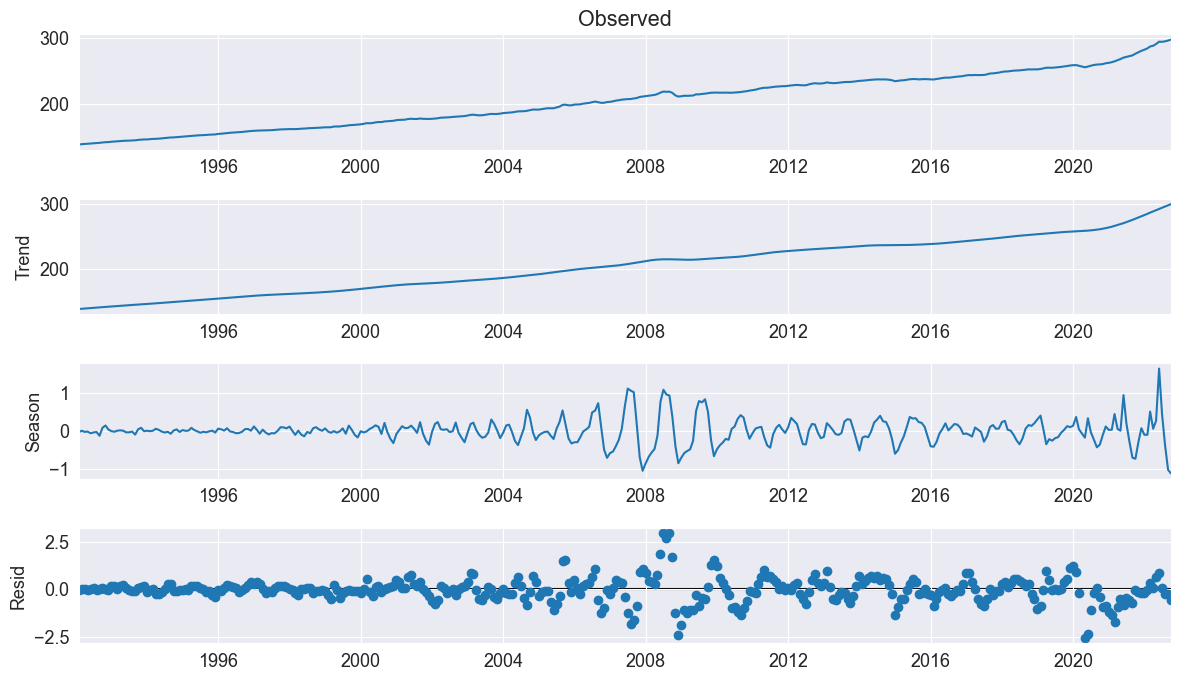

In [30]:
stl = STL(cpi, period=12)
res = stl.fit()
fig = res.plot()

## 2) CPI YoY

/Users/danieloliveira/opt/anaconda3/envs/fsl-ts/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


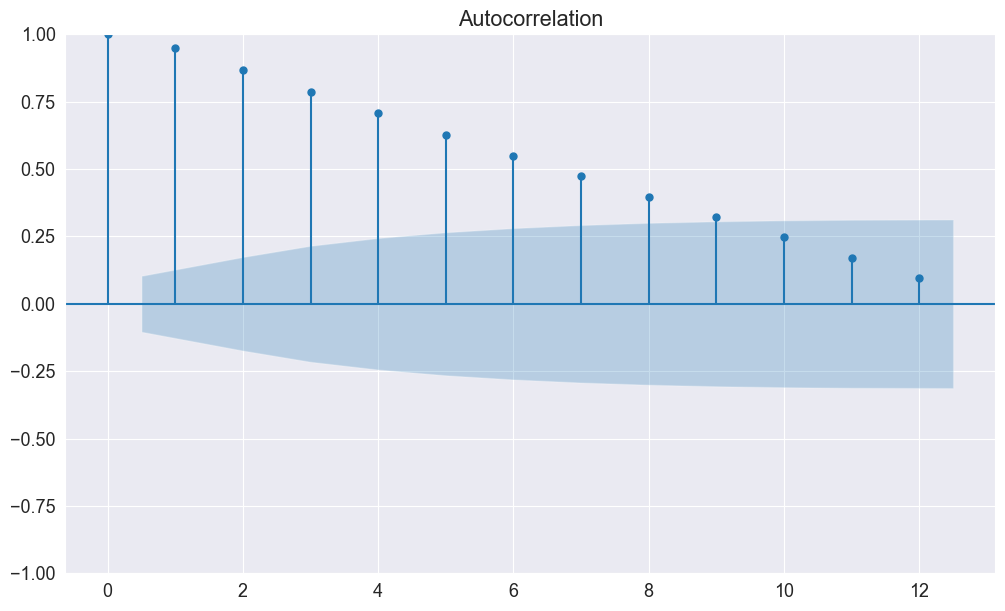

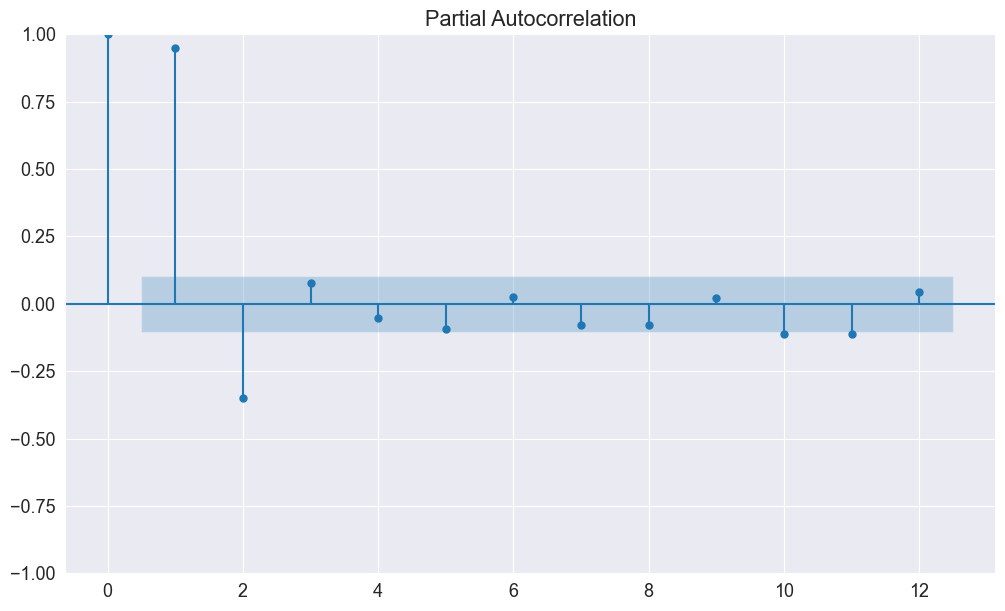

In [35]:
acf = plot_acf(cpi_yoy, lags = 12)
pacf = plot_pacf(cpi_yoy, lags = 12)

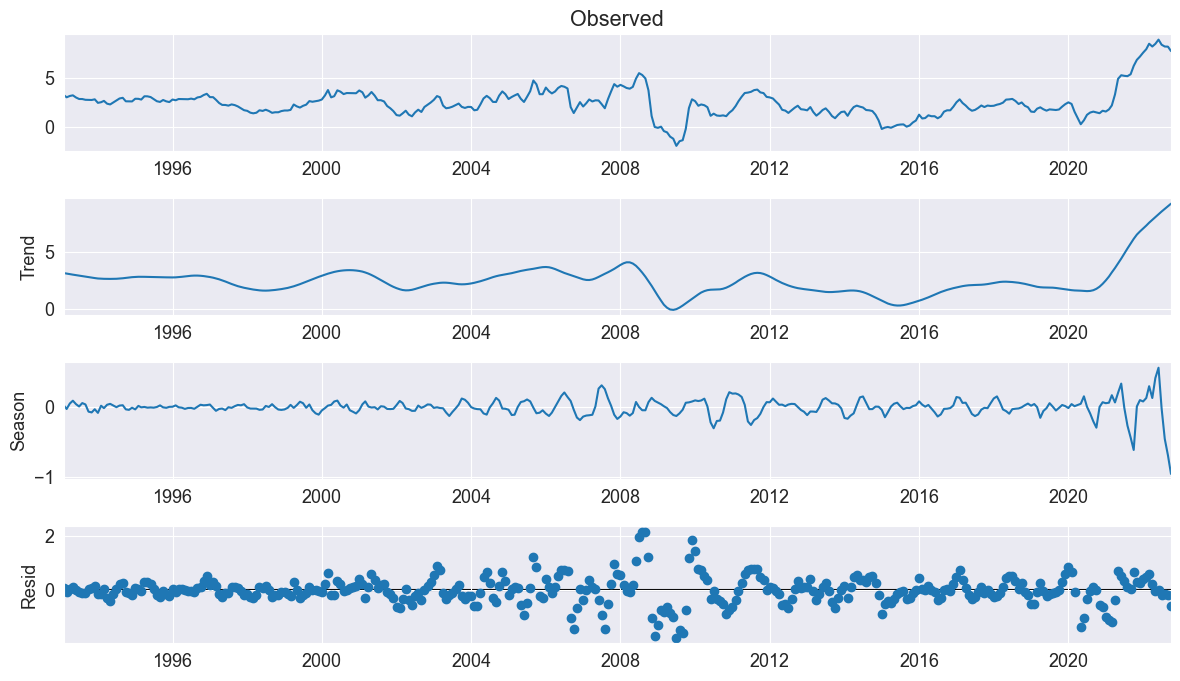

In [22]:
stl = STL(cpi_yoy, period=12)
res = stl.fit()
fig = res.plot()

## 3) CPI MoM

/Users/danieloliveira/opt/anaconda3/envs/fsl-ts/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


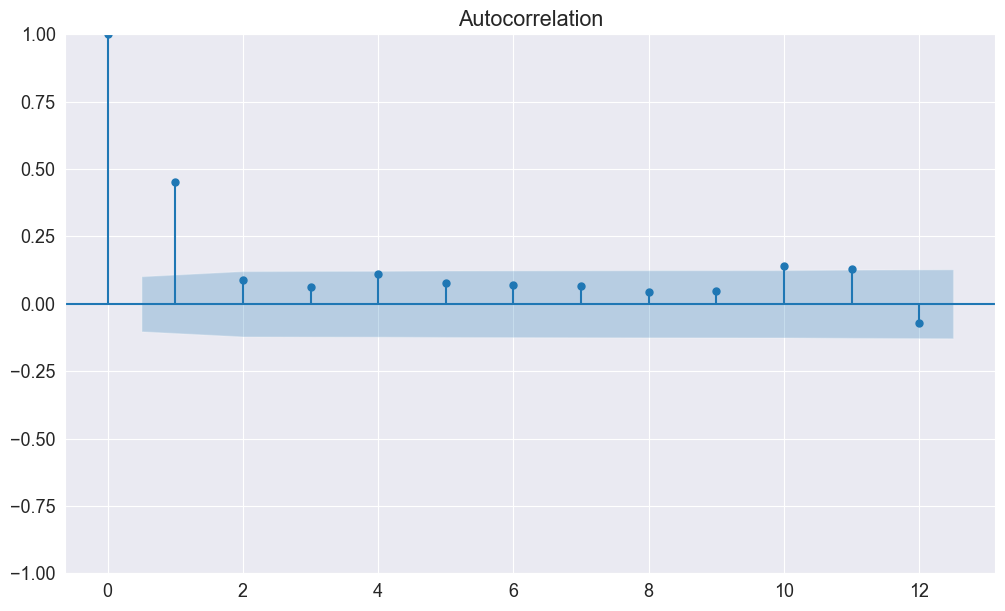

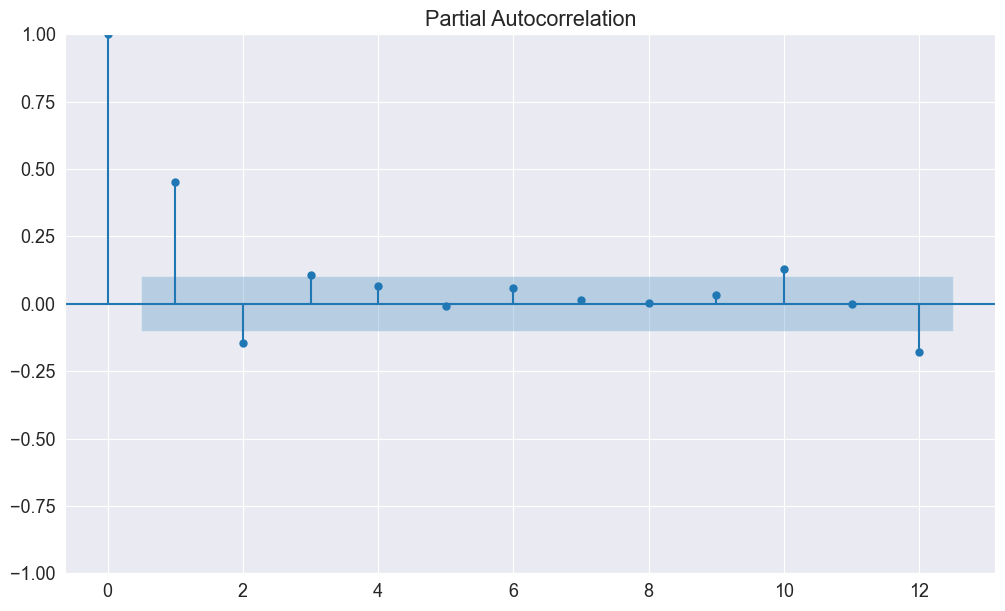

In [36]:
acf = plot_acf(cpi_mom, lags = 12)
pacf = plot_pacf(cpi_mom, lags = 12)

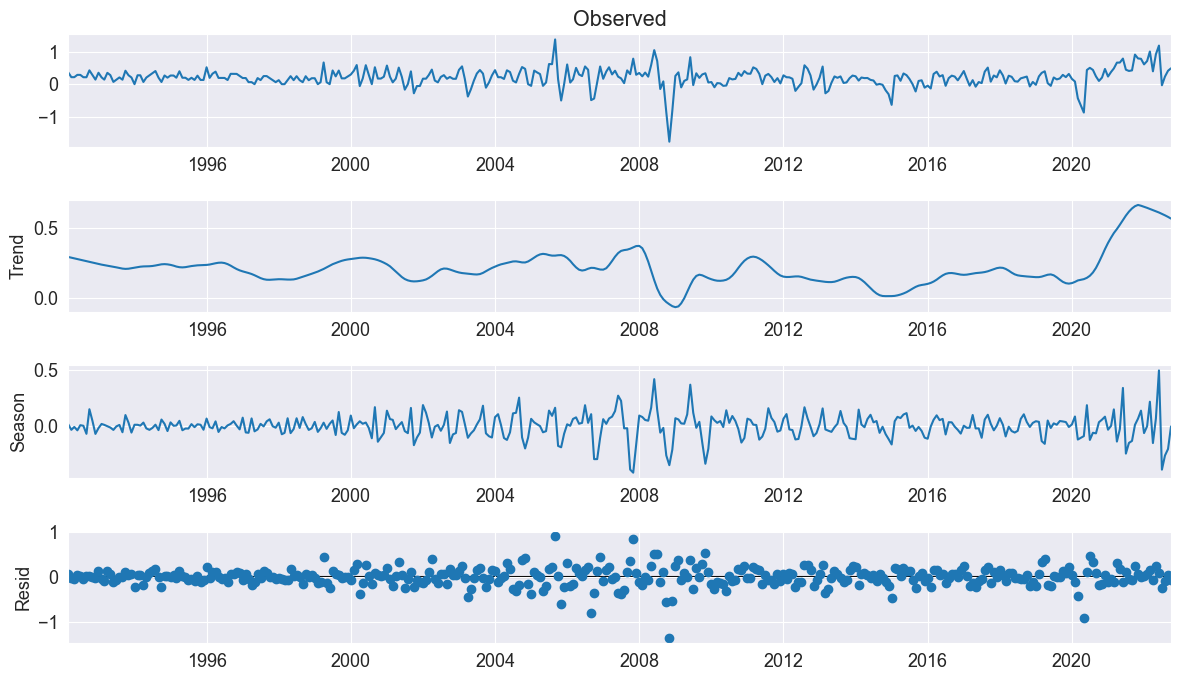

In [26]:
stl = STL(cpi_mom, period=12)
res = stl.fit()
fig = res.plot()